In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('CleanedSeattleData.csv')

X = df[['INTERSECTION', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]  # your features
y = df['INJURY_BINARY'] = df['SEVERITYCODE'].apply(lambda x: 1 if x > 1 else 0)


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state = 0)

best_accuracy = 0
best_depth = None

# Testing different max_depth values 
print("Evaluating different max_depth values on the validation set:")
for depth in range(1, 15):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    y_val_pred = tree.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Max Depth: {depth}, Validation Set Accuracy: {accuracy:.5f}")

    # Update the best_depth if the current depth accuracy is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"\nBest depth found: {best_depth} with Validation Set Accuracy: {best_accuracy:.5f}")

best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=0)
best_tree.fit(X_train, y_train)
y_test_pred = best_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy using best depth {best_depth}: {test_accuracy:.5f}")


Evaluating different max_depth values on the validation set:
Max Depth: 1, Validation Set Accuracy: 0.65820
Max Depth: 2, Validation Set Accuracy: 0.65964
Max Depth: 3, Validation Set Accuracy: 0.65896
Max Depth: 4, Validation Set Accuracy: 0.65888
Max Depth: 5, Validation Set Accuracy: 0.65935
Max Depth: 6, Validation Set Accuracy: 0.65941
Max Depth: 7, Validation Set Accuracy: 0.65929
Max Depth: 8, Validation Set Accuracy: 0.65917
Max Depth: 9, Validation Set Accuracy: 0.65882
Max Depth: 10, Validation Set Accuracy: 0.65882
Max Depth: 11, Validation Set Accuracy: 0.65882
Max Depth: 12, Validation Set Accuracy: 0.65882
Max Depth: 13, Validation Set Accuracy: 0.65882
Max Depth: 14, Validation Set Accuracy: 0.65882

Best depth found: 2 with Validation Set Accuracy: 0.65964
Test Set Accuracy using best depth 2: 0.65540


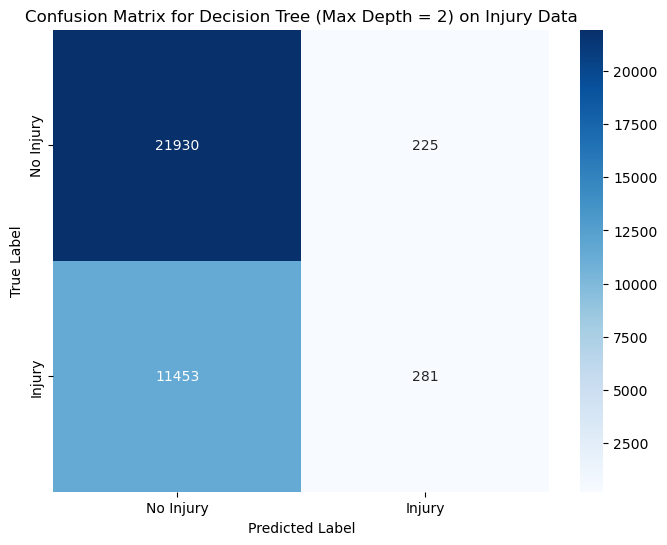

In [30]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.title('Confusion Matrix for Decision Tree (Max Depth = 2) on Injury Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

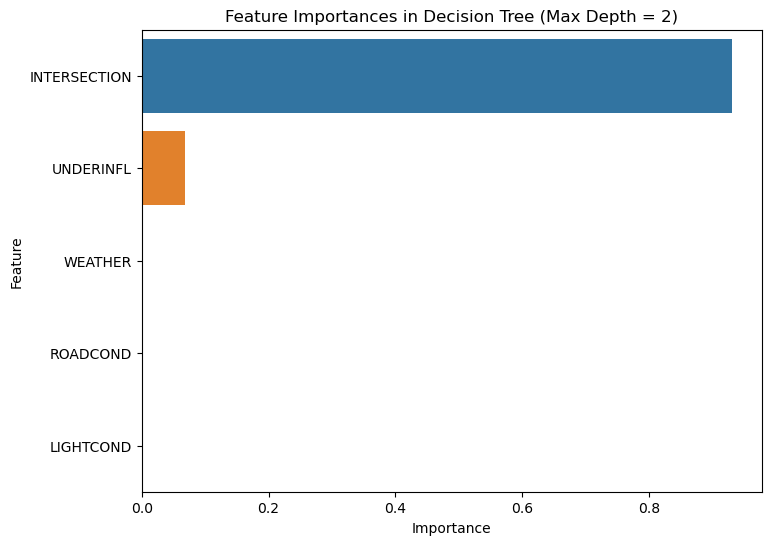

In [31]:
importances = best_tree.feature_importances_

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=X.columns)
plt.title('Feature Importances in Decision Tree (Max Depth = 2)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()